<a href="https://colab.research.google.com/github/vkurpmax/Machine-Learning/blob/main/HW_7_Hanif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/MachineLearning

df = pd.read_csv('/content/drive/My Drive/MachineLearning/iris.data')
df = df.append(df,ignore_index=True)
df

Mounted at /content/drive
/content/drive/My Drive/MachineLearning


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
293,6.7,3.0,5.2,2.3,Iris-virginica
294,6.3,2.5,5.0,1.9,Iris-virginica
295,6.5,3.0,5.2,2.0,Iris-virginica
296,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
X = df[df.columns[0:3]] 
y = df[df.columns[4]]

from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler(feature_range=(0, 10))
scaler = StandardScaler()
scaler.fit(X)
#scaler.data_max_
X=scaler.transform(X)
print(X)

[[-1.1483555  -0.11805969 -1.35396443]
 [-1.3905423   0.34485856 -1.41098555]
 [-1.51163569  0.11339944 -1.29694332]
 [-1.02726211  1.27069504 -1.35396443]
 [-0.54288852  1.9650724  -1.18290109]
 [-1.51163569  0.8077768  -1.35396443]
 [-1.02726211  0.8077768  -1.29694332]
 [-1.75382249 -0.34951881 -1.35396443]
 [-1.1483555   0.11339944 -1.29694332]
 [-0.54288852  1.50215416 -1.29694332]
 [-1.2694489   0.8077768  -1.23992221]
 [-1.2694489  -0.11805969 -1.35396443]
 [-1.87491588 -0.11805969 -1.52502777]
 [-0.05851493  2.19653152 -1.46800666]
 [-0.17960833  3.122368   -1.29694332]
 [-0.54288852  1.9650724  -1.41098555]
 [-0.90616871  1.03923592 -1.35396443]
 [-0.17960833  1.73361328 -1.18290109]
 [-0.90616871  1.73361328 -1.29694332]
 [-0.54288852  0.8077768  -1.18290109]
 [-0.90616871  1.50215416 -1.29694332]
 [-1.51163569  1.27069504 -1.58204889]
 [-0.90616871  0.57631768 -1.18290109]
 [-1.2694489   0.8077768  -1.06885886]
 [-1.02726211 -0.11805969 -1.23992221]
 [-1.02726211  0.8077768 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

(208, 3)
(90, 3)


In [ ]:
classifier = KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [ ]:
classifier.score(X_test, y_test)

0.9111111111111111

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


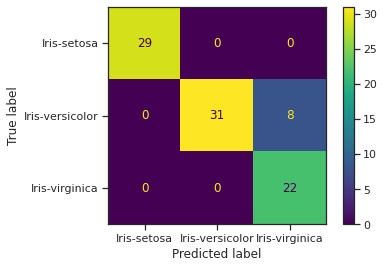

In [ ]:
#plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()

In [ ]:
classification_outcome = classifier.predict(X_test)
df_outcome = pd.DataFrame({"original value":y_test,"prediction":classification_outcome})
%cd /content/drive/My Drive/
df_outcome.to_excel('iris classification outcome.xlsx')
df_outcome.head()

/content/drive/My Drive


,original value,prediction
111,Iris-virginica,Iris-virginica
175,Iris-setosa,Iris-setosa
12,Iris-setosa,Iris-setosa
218,Iris-versicolor,Iris-virginica
205,Iris-versicolor,Iris-versicolor


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(classification_report(y_test,classification_outcome))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       1.00      0.79      0.89        39
 Iris-virginica       0.73      1.00      0.85        22

       accuracy                           0.91        90
      macro avg       0.91      0.93      0.91        90
   weighted avg       0.93      0.91      0.91        90

